In [16]:
import pandas as pd
import numpy as np

In [17]:
pd.options.mode.chained_assignment = None  # default='warn'

### Get Data

#### KPIs

In [18]:
KPIs = pd.read_csv('data/main/company_KPIs.csv')
KPIs = KPIs.rename(columns={'0':'company','1':'year' ,'2':'assets' , '3':'equity', '4':'current_ratio', '5':'qick_ratio', '6':'cash_ratio', '7':'debt2equity_ratio', '8':'debt2asset_ratio', '9':'equity_ratio', '10':'name_matching'})
KPIs = KPIs.loc[KPIs['year'] >= 2018]
KPIs.drop_duplicates(keep='first', inplace=True)

In [19]:
KPIs

,company,year,assets,equity,current_ratio,qick_ratio,cash_ratio,debt2equity_ratio,debt2asset_ratio,equity_ratio,name_matching
0,Zillertal GmbH,2020,7607535.72,4841744.70,1.910493,1.909975,0.418534,0.571239,0.363559,0.636441,Zillertal GmbH
1,Zillertal GmbH,2019,8505349.91,5265088.15,1.342073,1.341268,0.421875,0.615424,0.380967,0.619033,Zillertal GmbH
2,Zillertal GmbH,2018,8805104.33,5212040.17,1.159419,1.159419,0.357536,0.689378,0.408066,0.591934,Zillertal GmbH
4,Musikreisen Manufaktur GmbH,2020,571045.24,364066.46,9.055492,9.055492,3.723423,0.568519,0.362456,0.637544,Musikreisen Manufaktur GmbH
5,Musikreisen Manufaktur GmbH,2018,1234711.85,396880.42,3.656434,3.656434,0.859939,2.111042,0.678564,0.321436,Musikreisen Manufaktur GmbH
...,...,...,...,...,...,...,...,...,...,...,...
61637,Möschlitzer Agrar GmbH,2021,7853156.56,1905636.37,0.554566,0.491507,0.073642,3.019934,0.732813,0.242659,Möschlitzer Agrar GmbH
61638,Möschlitzer Agrar GmbH,2020,8402715.90,1899137.08,0.543835,0.487114,0.061558,3.306814,0.747388,0.226015,Möschlitzer Agrar GmbH
61639,Möschlitzer Agrar GmbH,2018,5554190.75,2448336.57,0.388395,0.253395,0.122428,1.141255,0.503075,0.440809,Möschlitzer Agrar GmbH
61640,Milchproduktion Kreinitz GmbH,2021,4091273.46,175280.62,0.912292,0.566302,0.000103,22.341277,0.957157,0.042843,Milchproduktion Kreinitz GmbH


In [20]:
KPIs.pivot_table(index="year" , aggfunc='count' ,values=['assets','equity','current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']).reset_index()

,year,assets,cash_ratio,current_ratio,debt2asset_ratio,debt2equity_ratio,equity,equity_ratio,qick_ratio
0,2018,13115,13115,13115,13115,13115,13115,13115,13115
1,2019,15146,15146,15146,15146,15146,15146,15146,15146
2,2020,14412,14412,14412,14412,14412,14412,14412,14412
3,2021,8851,8851,8851,8851,8851,8851,8851,8851
4,2022,145,145,145,145,145,145,145,145


In [21]:
KPIs.pivot_table(index="year" , aggfunc='mean' ,values=['assets','equity','current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']).reset_index()

,year,assets,cash_ratio,current_ratio,debt2asset_ratio,debt2equity_ratio,equity,equity_ratio,qick_ratio
0,2018,2.036832e+06,0.506837,1.958788,0.665359,5.132202,675808.959069,0.325966,1.503555
1,2019,2.014114e+06,0.512512,1.989869,0.668407,5.190632,672207.853303,0.340430,1.527248
2,2020,2.325350e+06,0.641954,2.499796,0.687696,5.696539,733659.289892,0.303107,1.959606
3,2021,2.830231e+06,0.781263,2.588704,0.679156,5.213952,932678.063662,0.309646,1.950887
4,2022,3.033270e+06,0.642313,2.279176,0.662540,4.782490,984030.586276,0.335448,1.541983


#### Aid Data

In [22]:
aid_data = pd.read_csv('data/main/all_companies.csv')  
aid_data = aid_data[["Name des Beihilfeempfängers",
    "Art des Beihilfeempfängers","Tag der Gewährung", 
    "Wirtschaftszweig (NACE)", 
    "Ziel der Beihilfe",
    "Beihilfeelement, in voller Höhe", 
    "Nominalbetrag" ,
    "Beihilfeinstrument"]]
aid_data["Tag der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True).dt.strftime('%Y').astype(int)
aid_data.rename(columns={"Tag der Gewährung": "Jahr der Gewährung"}, inplace=True)
#aid_data

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_45915/627905667.py:1: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  aid_data = pd.read_csv('data/main/all_companies.csv')


replace names with correct names:

In [117]:
aid_data = aid_data.merge(KPIs[['name_matching', 'company']], 
                how='left', 
                left_on='Name des Beihilfeempfängers', 
                right_on='name_matching')

aid_data['Name des Beihilfeempfängers'] = np.where(aid_data['company'].isna() , aid_data['Name des Beihilfeempfängers'], aid_data['company'])

aid_data = aid_data.drop(columns = ['name_matching', 'company'])
aid_data.drop_duplicates(keep='first', inplace=True)
aid_data

,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Jahr der Gewährung,Wirtschaftszweig (NACE),Ziel der Beihilfe,"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,Behebung einer beträchtlichen Störung im Wirts...,126350.0,NaN,Sonstiges (bitte angeben)
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,Behebung einer beträchtlichen Störung im Wirts...,150000.0,NaN,Sonstiges (bitte angeben)
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",Behebung einer beträchtlichen Störung im Wirts...,141904.0,NaN,Sonstiges (bitte angeben)
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,Behebung einer beträchtlichen Störung im Wirts...,107526.0,NaN,Sonstiges (bitte angeben)
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,Behebung einer beträchtlichen Störung im Wirts...,150000.0,NaN,Sonstiges (bitte angeben)
...,...,...,...,...,...,...,...,...
137139,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,Behebung einer beträchtlichen Störung im Wirts...,315000.0,315000.0,Bürgschaft
137141,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,Behebung einer beträchtlichen Störung im Wirts...,67500.0,67500.0,Bürgschaft
137142,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,Behebung einer beträchtlichen Störung im Wirts...,180000.0,180000.0,Bürgschaft
137143,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,Behebung einer beträchtlichen Störung im Wirts...,405000.0,405000.0,Bürgschaft


In [24]:
aid_data.pivot_table(index="Beihilfeinstrument", columns='Jahr der Gewährung' , aggfunc='count' ,values=['Beihilfeelement, in voller Höhe', 'Nominalbetrag'])#.reset_index()

Beihilfeelement, in voller Höhe  \
Jahr der Gewährung                                               2020   
Beihilfeinstrument                                                      
Andere Formen der Kapitalintervention                            93.0   
Bürgschaft                                                       84.0   
Eigenkapitalinstrumente                                           NaN   
Kredite/rückzahlbare Vorschüsse                                   0.0   
Sonstiges (bitte angeben)                                     35993.0   
Zinsgünstiges Darlehen                                           75.0   
Zinszuschuss                                                   2170.0   
Zuschuss                                                       5354.0   

                                               Nominalbetrag           
Jahr der Gewährung                        2021          2020     2021  
Beihilfeinstrument                                                     
Andere Formen der Kapitalintervention    267.0          72.0    284.0  
Bürgschaft                                62.0          90.0     65.0  
Eigenkapitalinstrumente                    2.0           NaN      3.0  
Kredite/rückzahlbare Vorschüsse            NaN           6.0      NaN  
Sonstiges (bitte angeben)                  6.0       14118.0     57.0  
Zinsgünstiges Darlehen                 14779.0          51.0  14799.0  
Zinszuschuss                              22.0         747.0     22.0  
Zuschuss                               55903.0           0.0      0.0

'Sonstiges (bitte angeben)' wurde zu 99% von der KFW gewährt. Dabei handelt es sich um das KfW-Sonderprogramm 2020. Dieses enhält Kredite und keine Zuschüsse.

In [25]:
aid_data.pivot_table(index="Beihilfeinstrument" , columns='Jahr der Gewährung' , aggfunc='mean' ,values=['Beihilfeelement, in voller Höhe', 'Nominalbetrag'])#.reset_index()

Beihilfeelement, in voller Höhe  \
Jahr der Gewährung                                               2020   
Beihilfeinstrument                                                      
Andere Formen der Kapitalintervention                    7.260176e+07   
Bürgschaft                                               1.064780e+06   
Eigenkapitalinstrumente                                           NaN   
Kredite/rückzahlbare Vorschüsse                                   NaN   
Sonstiges (bitte angeben)                                3.945926e+05   
Zinsgünstiges Darlehen                                   2.659226e+06   
Zinszuschuss                                             1.825203e+06   
Zuschuss                                                 1.629533e+05   

                                                    Nominalbetrag  \
Jahr der Gewährung                             2021          2020   
Beihilfeinstrument                                                  
Andere Formen der Kapitalintervention  2.901381e+06  9.517486e+05   
Bürgschaft                             1.805978e+06  2.388713e+06   
Eigenkapitalinstrumente                5.512475e+08           NaN   
Kredite/rückzahlbare Vorschüsse                 NaN  1.255363e+08   
Sonstiges (bitte angeben)              3.983333e+05  4.845056e+05   
Zinsgünstiges Darlehen                 3.591382e+05  6.347843e+06   
Zinszuschuss                           1.664367e+05  9.493675e+06   
Zuschuss                               3.279175e+05           NaN   

                                                     
Jahr der Gewährung                             2021  
Beihilfeinstrument                                   
Andere Formen der Kapitalintervention  2.415642e+06  
Bürgschaft                             1.384522e+07  
Eigenkapitalinstrumente                9.831667e+06  
Kredite/rückzahlbare Vorschüsse                 NaN  
Sonstiges (bitte angeben)              3.714561e+05  
Zinsgünstiges Darlehen                 4.718792e+05  
Zinszuschuss                           1.979091e+06  
Zuschuss                                        NaN

In [26]:
aid_data_agg = aid_data.groupby(['Name des Beihilfeempfängers', 'Jahr der Gewährung','Beihilfeinstrument']).sum().reset_index()#'Art des Beihilfeempfängers','Wirtschaftszweig (NACE)'
aid_data_agg['Beihilfeinstrument'] = np.where(aid_data_agg['Beihilfeinstrument'] == 'Sonstiges (bitte angeben)', 'KFW_Kredit', aid_data_agg['Beihilfeinstrument'])
aid_data_agg 

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_45915/3133276961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aid_data_agg = aid_data.groupby(['Name des Beihilfeempfängers', 'Jahr der Gewährung','Beihilfeinstrument']).sum().reset_index()#'Art des Beihilfeempfängers','Wirtschaftszweig (NACE)'


,Name des Beihilfeempfängers,Jahr der Gewährung,Beihilfeinstrument,"Beihilfeelement, in voller Höhe",Nominalbetrag
0,"""AUX PIEDS DE LA TOUR EIFFEL""",2020,KFW_Kredit,100000.00,0.0
1,"""BEDES"" NUTZFAHRZEUG-REPARATUR",2020,KFW_Kredit,300000.00,300000.0
2,"""BIWAKSCHACHTEL"" BERGSPORTHAND",2020,KFW_Kredit,200000.00,200000.0
3,"""BRAUHAUS STEPHANUS"" STEPHAN U",2020,KFW_Kredit,400000.00,0.0
4,"""BUCH-EXPRESS"" TRANSPORT GMBH",2020,KFW_Kredit,250000.00,0.0
...,...,...,...,...,...
103313,„DINGHARTINGER APFELSTRUDEL“ PRODUKTIONS- UND ...,2021,Zuschuss,804177.00,0.0
103314,�VOLUTION SYNERG�TIQUE GMBH,2020,KFW_Kredit,500000.00,0.0
103315,�berland Reisen Berlin GmbH,2020,Zuschuss,275386.00,0.0
103316,�bermorgen Getr�nke- Trendprodukte Vertriebsge...,2021,Zuschuss,153945.99,0.0


#### Merge Data

### Diff and Diff

#### 2020

In [364]:
df_reg = KPIs.loc[(KPIs['year'] == 2019)| (KPIs['year'] == 2020)]
#df_reg = df_reg.groupby('name_matching').filter(lambda x : len(x)==2)
df_reg = df_reg.merge(aid_data_agg.loc[(aid_data_agg['Beihilfeinstrument'] == 'Zuschuss') & (aid_data_agg['Jahr der Gewährung'] == 2020)], 
                how='left', 
                left_on=['company'                ,'year'], 
                right_on=['Name des Beihilfeempfängers','Jahr der Gewährung'])

df_reg = df_reg.drop(columns = ['Name des Beihilfeempfängers', 'name_matching',	'Name des Beihilfeempfängers'])
df_reg.drop_duplicates(subset = ['company','year','Beihilfeinstrument'], keep='first', inplace=True)
df_reg["Beihilfeinstrument"] = np.where(df_reg["Beihilfeinstrument" ] == "Zuschuss", 1, 0)

treated = df_reg[df_reg[['Beihilfeinstrument']].Beihilfeinstrument == 1]['company'].to_numpy()
df_reg["Treated"] = np.isin(df_reg["company"].to_numpy(),treated)
df_reg["Treated"].replace({True: 1, False: 0}, inplace=True)
df_reg

,company,year,assets,equity,current_ratio,qick_ratio,cash_ratio,debt2equity_ratio,debt2asset_ratio,equity_ratio,Jahr der Gewährung,Beihilfeinstrument,"Beihilfeelement, in voller Höhe",Nominalbetrag,Treated
0,Zillertal GmbH,2020,7607535.72,4841744.70,1.910493,1.909975,0.418534,0.571239,0.363559,0.636441,2020.0,1,150000.0,0.0,1
1,Zillertal GmbH,2019,8505349.91,5265088.15,1.342073,1.341268,0.421875,0.615424,0.380967,0.619033,NaN,0,NaN,NaN,1
2,Musikreisen Manufaktur GmbH,2020,571045.24,364066.46,9.055492,9.055492,3.723423,0.568519,0.362456,0.637544,2020.0,1,150000.0,0.0,1
3,Junges Hotel Hamburg Betriebsgesellschaft mbH,2019,547958.27,214477.18,0.678635,0.509036,0.042462,1.554856,0.608588,0.391412,NaN,0,NaN,NaN,0
4,SeaTravel HAM Kreuzfahrten GmbH,2020,757140.20,124036.25,1.171091,1.137893,0.019128,5.104185,0.836178,0.163822,2020.0,1,124687.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,by Riese GmbH & Co. KG,2019,1490324.35,1239657.34,7.424714,2.776208,0.613099,0.202207,0.168196,0.831804,NaN,0,NaN,NaN,0
29554,Saaleblick Agrar GmbH Gräfenwarth,2020,2990606.05,591837.85,0.431386,0.342247,0.005597,4.024574,0.796459,0.197899,2020.0,1,15000.0,0.0,1
29555,Saaleblick Agrar GmbH Gräfenwarth,2019,1336152.43,768341.03,0.675879,0.272554,0.033859,0.706860,0.406473,0.575040,NaN,0,NaN,NaN,1
29556,Möschlitzer Agrar GmbH,2020,8402715.90,1899137.08,0.543835,0.487114,0.061558,3.306814,0.747388,0.226015,2020.0,1,20000.0,0.0,1


In [366]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_reg[['year', 'Treated']]
#X["Beihilfeinstrument" ] = np.where(X["Beihilfeinstrument" ] == "Zuschuss", 1, 0)
X["year"].replace({2019: 0, 2020: 1}, inplace=True)
X["combined"] = X["year" ]*X["Treated"]
kpi_list = ['current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']

for kpi in kpi_list:
    print(kpi)
    y = df_reg[kpi]
    lr.fit(X, y)
    print(lr.coef_) 

current_ratio
[ 0.50222377 -0.05145792 -0.14444443]
qick_ratio
[ 0.41770231  0.25228817 -0.0725636 ]
cash_ratio
[ 0.13053759  0.20342164 -0.09535859]
debt2equity_ratio
[ 0.35873581 -0.63209138  1.01165659]
debt2asset_ratio
[ 0.01442229 -0.04095051  0.02363221]
equity_ratio
[-0.0355087  0.0234049 -0.0017216]


<Axes: >

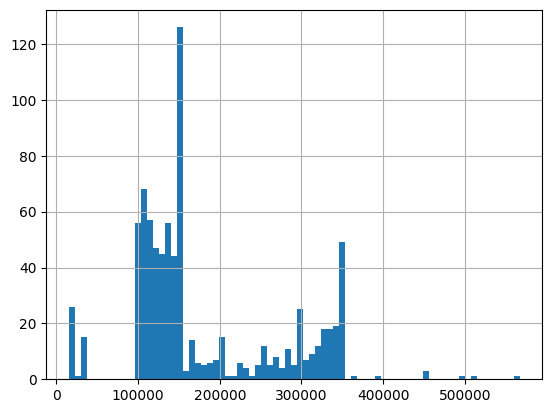

In [367]:
df_reg['Beihilfeelement, in voller Höhe'].hist(bins=75)

#### 2021

In [377]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

df_reg = KPIs.loc[(KPIs['year'] == 2020)| (KPIs['year'] == 2021)]
df_reg = df_reg.merge(aid_data_agg.loc[(aid_data_agg['Beihilfeinstrument'] == 'Zuschuss') & (aid_data_agg['Jahr der Gewährung'] == 2021)], 
                how='left', 
                left_on=['company'                ,'year'], 
                right_on=['Name des Beihilfeempfängers','Jahr der Gewährung'])


df_reg = df_reg.drop(columns = ['Name des Beihilfeempfängers', 'name_matching',	'Name des Beihilfeempfängers'])
df_reg.drop_duplicates(subset = ['company','year','Beihilfeinstrument'], keep='first', inplace=True)
df_reg["Beihilfeinstrument"] = np.where(df_reg["Beihilfeinstrument"] == "Zuschuss", 1, 0)

#############
df_reg['aid_relative'] = df_reg['Beihilfeelement, in voller Höhe'] / df_reg['assets']
df_reg = df_reg.drop(df_reg[df_reg['aid_relative'] > df_reg['aid_relative'].quantile(.95)].index)
#############

treated = df_reg[df_reg[['Beihilfeinstrument']].Beihilfeinstrument == 1]['company'].to_numpy()
df_reg["Treated"] = np.isin(df_reg["company"].to_numpy(),treated)
df_reg["Treated"].replace({True: 1, False: 0}, inplace=True)

X = df_reg[['year', 'Treated']]
X["year"].replace({2020: 0, 2021: 1}, inplace=True)
X["combined"] = X["Treated" ]*X["year"]

kpi_list = ['current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']
for kpi in kpi_list:
    print(kpi)
    y = df_reg[kpi]
    #print(X, y)
    lr.fit(X, y)
    print(lr.coef_)

current_ratio
[-0.03361866  0.09835498  0.24628758]
qick_ratio
[-0.23853104  0.18044032  0.41976776]
cash_ratio
[-0.04654494  0.10464323  0.33607339]
debt2equity_ratio
[-0.02351208 -1.51514526 -0.06375708]
debt2asset_ratio
[ 0.02365707 -0.06650353 -0.03332018]
equity_ratio
[-0.02601553  0.0694342   0.03242086]


In [382]:
import statsmodels.api as sm
x = sm.add_constant(X)
results = sm.OLS(df_reg['cash_ratio'],x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             cash_ratio   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     223.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          9.70e-143
Time:                        19:11:58   Log-Likelihood:                -26143.
No. Observations:               21009   AIC:                         5.229e+04
Df Residuals:                   21005   BIC:                         5.233e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6195      0.008     75.891      0.0

In [ ]:
import scipy.stats as stats

ax = sns.distplot(results.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [281]:
import statsmodels.api as sm
x = sm.add_constant(X)
results = sm.OLS(df_reg['qick_ratio'],x).fit()
print(results.summary())
print(':')
print(':')
print(':')

                            OLS Regression Results                            
Dep. Variable:             qick_ratio   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     96.04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.02e-42
Time:                        16:45:57   Log-Likelihood:                -44167.
No. Observations:               21188   AIC:                         8.834e+04
Df Residuals:                   21185   BIC:                         8.836e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9462      0

In [305]:
from statsmodels.formula.api import ols
yX = pd.DataFrame()
yX['kpi'] = df_reg['qick_ratio']
yX['Beihilfeinstrument'] = X["Beihilfeinstrument"]
yX['year'] = X["year"]
yX['combined'] = X["combined" ]
print(yX)


ols = ols('kpi ~  Beihilfeinstrument + year + combined', data=yX).fit()
print(ols.summary())

            kpi  Beihilfeinstrument  year  combined
0      1.909975                   0     0         0
1      9.055492                   0     0         0
2      1.954795                   1     1         1
3      1.137893                   0     0         0
4      1.939249                   1     1         1
...         ...                 ...   ...       ...
23258  0.375583                   0     1         0
23259  0.342247                   0     0         0
23260  0.491507                   0     1         0
23261  0.487114                   0     0         0
23262  0.566302                   0     1         0

[21012 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     58.63
Date:                Wed, 05 Apr 2

### Plots

In [ ]:
df_reg = KPIs.loc[(KPIs['year'] == 2020)| (KPIs['year'] == 2021)]
#df_reg = df_reg.groupby('name_matching').filter(lambda x : len(x)==2)
df_reg = df_reg.merge(aid_data_agg.loc[(aid_data_agg['Beihilfeinstrument'] == 'Zuschuss') & (aid_data_agg['Jahr der Gewährung'] == 2021)], 
                how='left', 
                left_on=['company'                ,'year'], 
                right_on=['Name des Beihilfeempfängers','Jahr der Gewährung'])

df_reg = df_reg.drop(columns = ['Name des Beihilfeempfängers', 'name_matching',	'Name des Beihilfeempfängers'])
df_reg.drop_duplicates(subset = ['company','year','Beihilfeinstrument'], keep='first', inplace=True)
df_reg["Beihilfeinstrument" ] = np.where(df_reg["Beihilfeinstrument" ] == "Zuschuss", 1, 0)
df_reg

<Axes: >

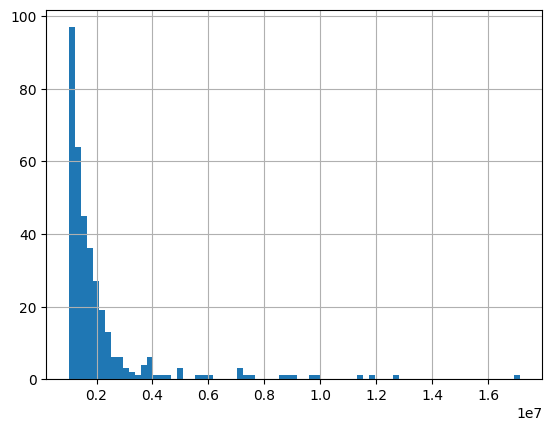

In [182]:
df_reg.loc[df_reg['Beihilfeelement, in voller Höhe'] > 1000000]['Beihilfeelement, in voller Höhe'].hist(bins=75)

<Axes: >

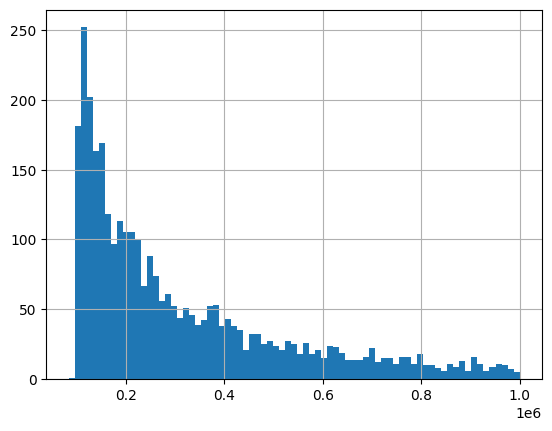

In [181]:
df_reg.loc[df_reg['Beihilfeelement, in voller Höhe'] <= 1000000]['Beihilfeelement, in voller Höhe'].hist(bins=75)

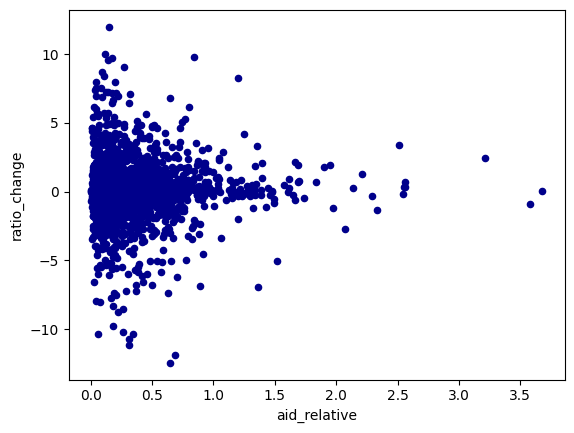

In [233]:
df_plot = df_reg#[['company','year','assets','Beihilfeelement, in voller Höhe','current_ratio']]

df_plot['aid_relative'] = df_plot['Beihilfeelement, in voller Höhe'] / df_plot['assets']

df_plot = df_plot.drop(columns = ['Beihilfeelement, in voller Höhe', 'assets'])

df_plot = df_plot.pivot_table(index='company', columns='year', values=['current_ratio','aid_relative']).reset_index()

df_plot['ratio_change'] = (df_plot['current_ratio'][2021] - df_plot['current_ratio'][2020] )# / df_elasticity['current_ratio'][2019] 

ax1 = df_plot.plot.scatter(y='ratio_change',x='aid_relative',c='DarkBlue')

In [270]:
df_plot = df_reg#[['company','year','assets','Beihilfeelement, in voller Höhe','debt2equity_ratio']]

df_plot['aid_relative'] = df_plot['Beihilfeelement, in voller Höhe'] / df_plot['assets']

df_plot = df_plot.pivot_table(index='company', columns='year', values=['debt2equity_ratio','aid_relative']).reset_index()

df_plot['ratio_change'] = df_plot['debt2equity_ratio'][2021] - df_plot['debt2equity_ratio'][2020]

#ax1 = df_elasticity.plot.scatter(y='ratio_change',x='aid_relative',c='DarkBlue')
#df_plot[df_plot['aid_relative'][2021] < 1 ]
df_plot[df_plot['aid_relative'][2021] < df_plot['aid_relative'][2021].quantile(.99)]

company aid_relative debt2equity_ratio  \
year                                                2021              2020   
29                    21st Real Estate GmbH     0.314365          1.644776   
36                          2P Fashion GmbH     0.424700          0.766545   
40     2be secured facility management GmbH     0.164803          5.164373   
41                          2e Systems GmbH     0.171673               NaN   
42                      2nd Home Hotel GmbH     1.080514               NaN   
...                                     ...          ...               ...   
15107                           xalino GmbH     0.193085          0.626171   
15119                        zoells.de GmbH     0.145035               NaN   
15120                       zum LOEWEN GmbH     0.587497          0.803133   
15122                            zweiB GmbH     0.422494          0.813738   
15124  Öko-Bäckerei-Konditorei Mauerer GmbH     0.249530          1.589221   

                ratio_change  
year       2021               
29     2.499025     0.854248  
36     0.743776    -0.022769  
40     5.807514     0.643141  
41     1.056615          NaN  
42     4.076416          NaN  
...         ...          ...  
15107  0.641191     0.015020  
15119  2.196579          NaN  
15120  0.503110    -0.300023  
15122  0.668845    -0.144893  
15124  1.388006    -0.201215  

[3541 rows x 5 columns]

In [ ]:
df_plot['aid_relative'].hist(bins=75)

/Users/marco/opt/anaconda3/envs/env_3_9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


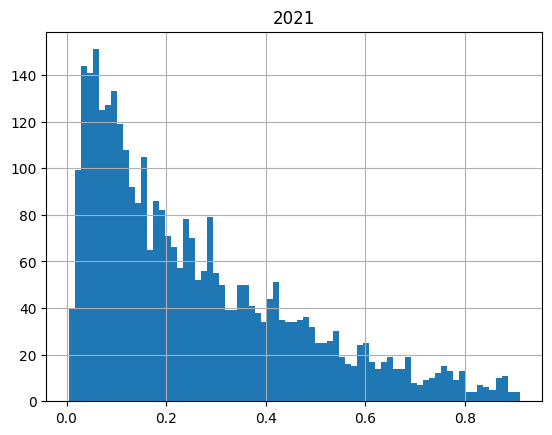

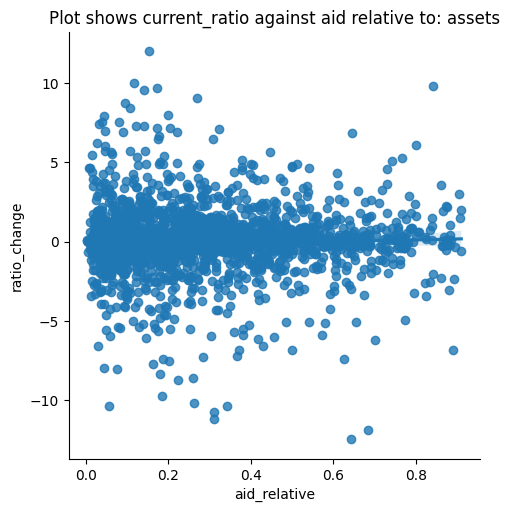

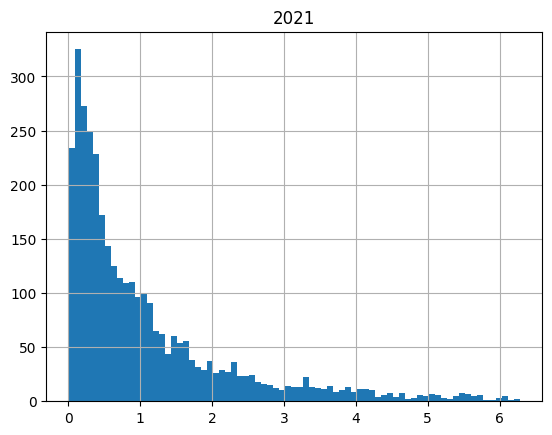

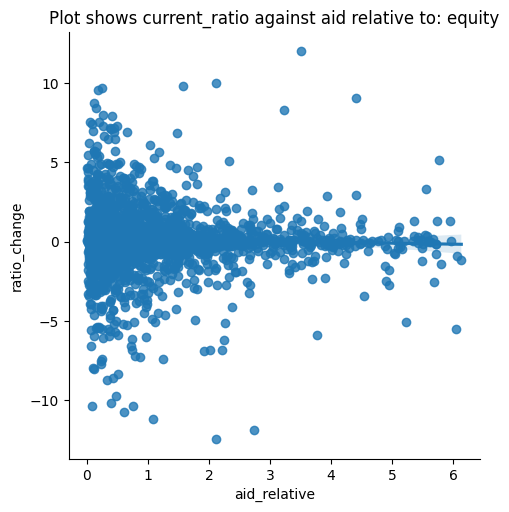

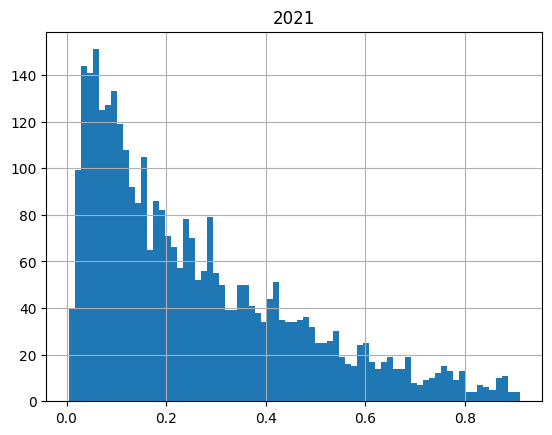

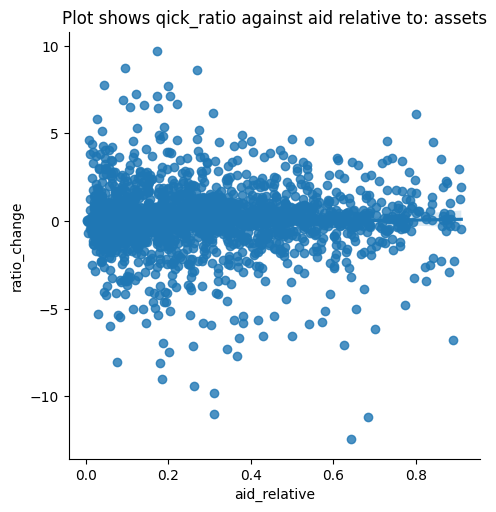

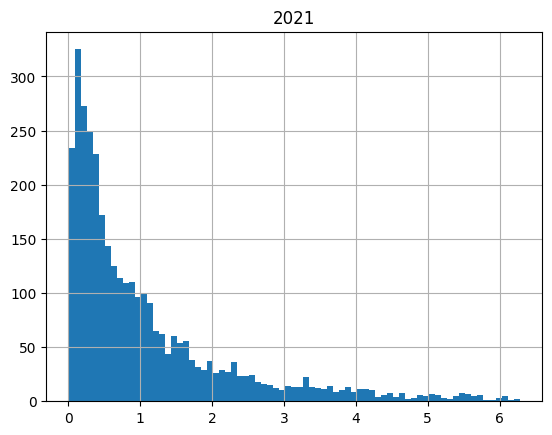

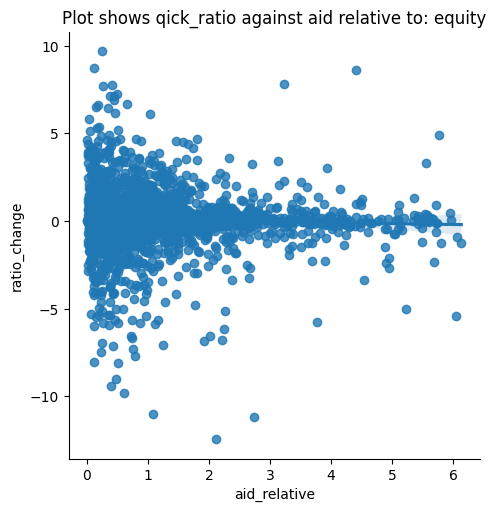

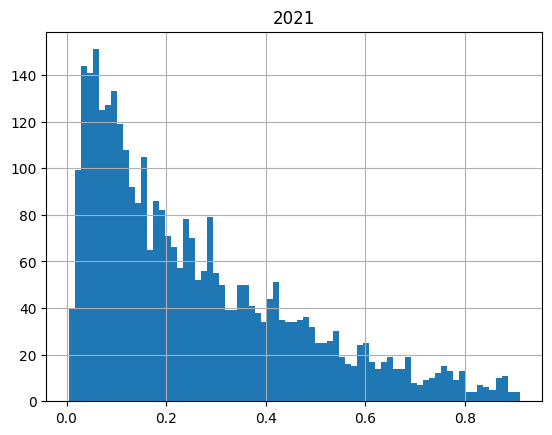

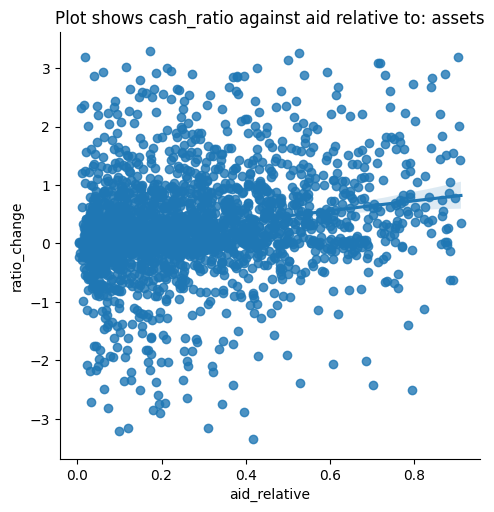

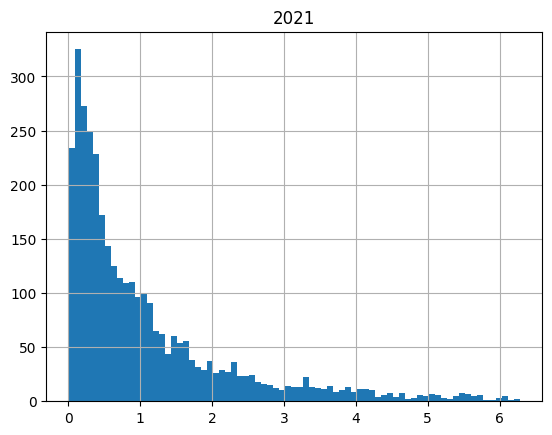

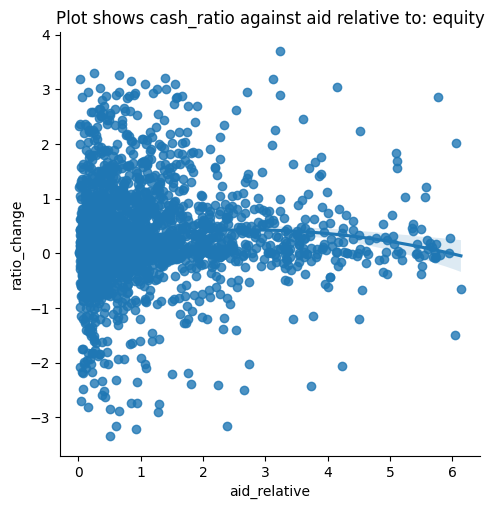

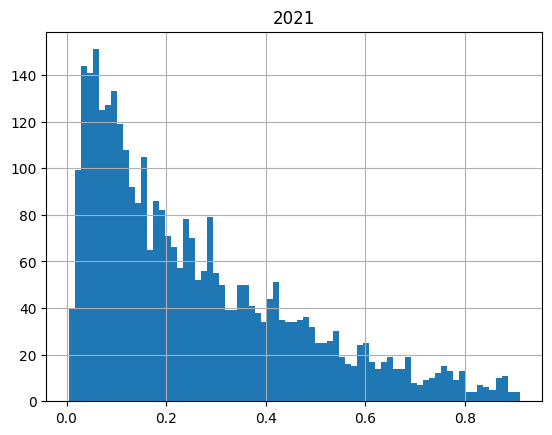

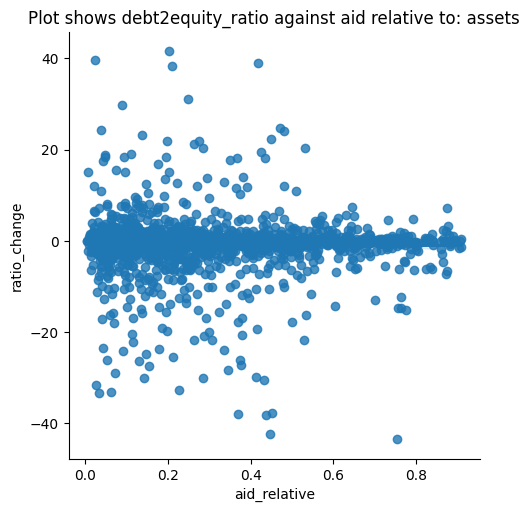

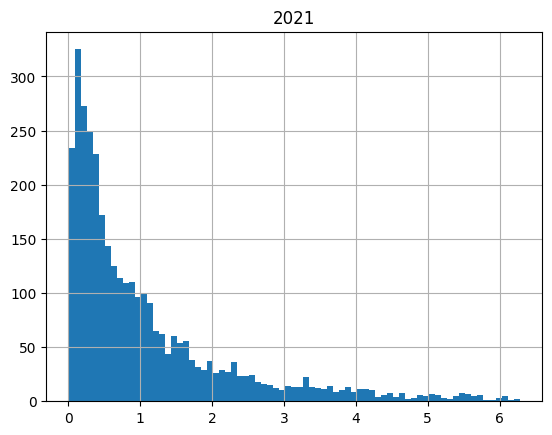

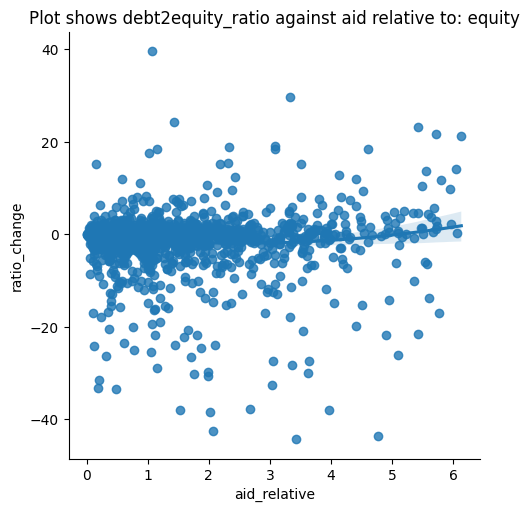

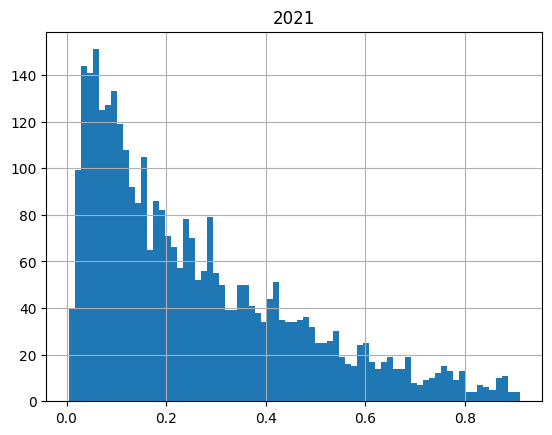

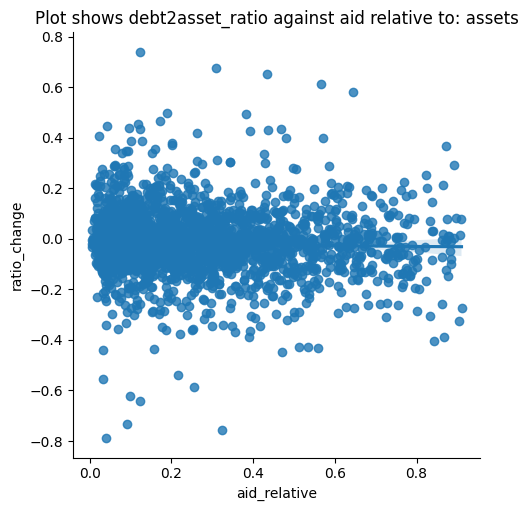

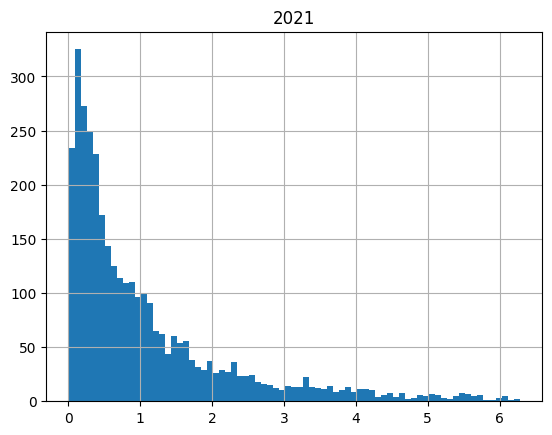

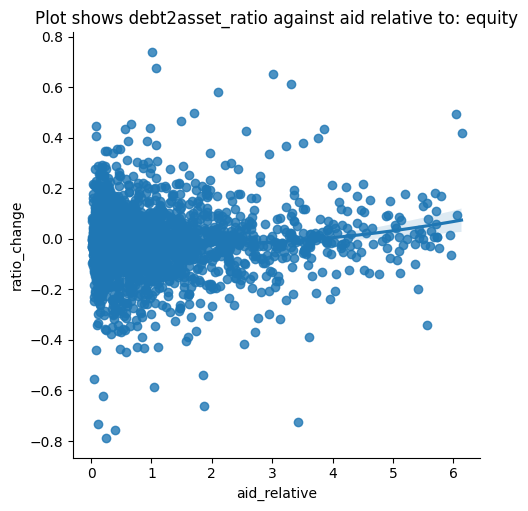

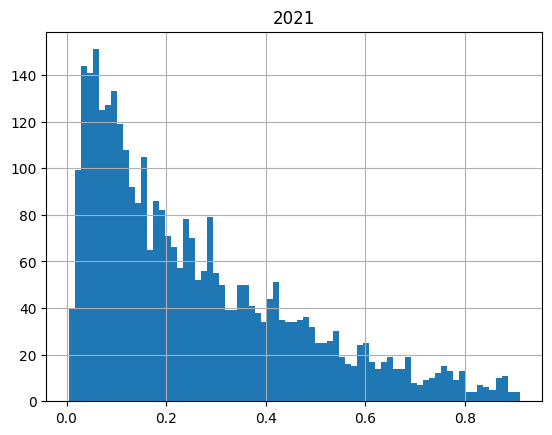

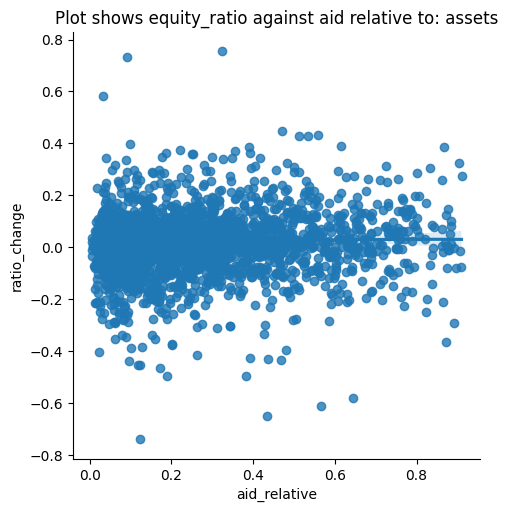

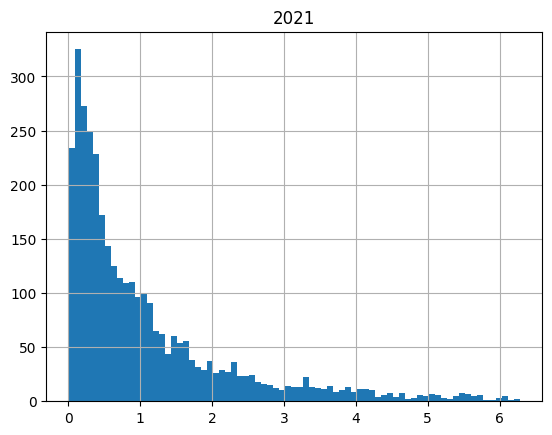

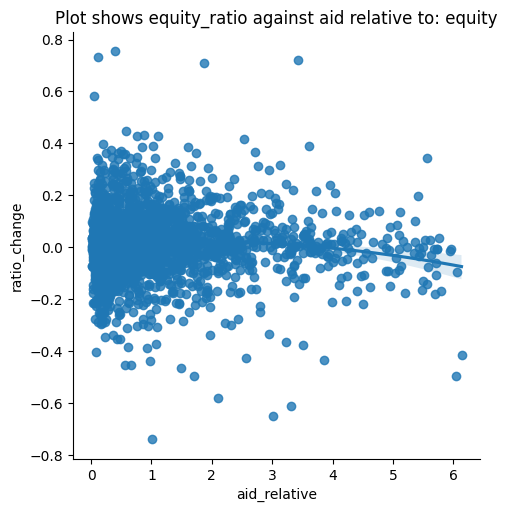

In [279]:
import seaborn as sns
kpi_list = ['current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']
for kpi in kpi_list:
    for reference_account in ['assets','equity']:
        df_plot = df_reg
        df_plot['aid_relative'] = df_plot['Beihilfeelement, in voller Höhe'] / df_plot[reference_account]
        #df_elasticity = df_elasticity.pivot_table(index='company', columns='year', values=[kpi,'aid_relative']).reset_index()
        df_plot = df_plot.pivot_table(index='company', columns='year', values=[kpi,'aid_relative']).reset_index()

        df_plot['ratio_change'] = df_plot[kpi][2021] - df_plot[kpi][2020]
        Title = f'Plot shows {kpi} against aid relative to: {reference_account}'
        #ax1 = df_elasticity.plot.scatter(y='ratio_change',x='aid_relative',c='DarkBlue')
        #sns.lmplot(x='aid_relative',y='ratio_change',data=df_elasticity,fit_reg=True)
        df_plot = df_plot[df_plot['aid_relative'][2021] < df_plot['aid_relative'][2021].quantile(.95)]
        df_plot['aid_relative'].hist(bins=75)
        sns.lmplot(x='aid_relative',y='ratio_change',data=df_plot,fit_reg=True, order=2).set(title=Title)

### IPW

In [1]:
from causallib.datasets import load_nhefs
from causallib.estimation import IPW
from causallib.evaluation import evaluate
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [3]:
data = load_nhefs()
learner = LogisticRegression(solver="liblinear")
ipw = IPW(learner)
ipw.fit(data.X, data.a)

IPW(clip_max=None, clip_min=None, use_stabilized=False, verbose=False,
    learner=LogisticRegression(solver='liblinear'))

In [6]:
data.X

,age,race,sex,smokeintensity,smokeyrs,wt71,active_1,active_2,education_2,education_3,education_4,education_5,exercise_1,exercise_2,age^2,wt71^2,smokeintensity^2,smokeyrs^2
0,42,1,0,30,29,79.04,0,0,0,0,0,0,0,1,1764,6247.3216,900,841
1,36,0,0,20,24,58.63,0,0,1,0,0,0,0,0,1296,3437.4769,400,576
2,56,1,1,20,26,56.81,0,0,1,0,0,0,0,1,3136,3227.3761,400,676
3,68,1,0,3,53,59.42,1,0,0,0,0,0,0,1,4624,3530.7364,9,2809
4,40,0,0,20,19,87.09,1,0,1,0,0,0,1,0,1600,7584.6681,400,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,47,0,1,20,31,84.94,0,0,0,0,0,0,0,0,2209,7214.8036,400,961
1624,45,0,0,40,29,63.05,0,0,0,0,0,0,0,0,2025,3975.3025,1600,841
1625,47,0,1,20,31,57.72,0,0,0,0,0,0,0,0,2209,3331.5984,400,961
1627,68,0,0,15,46,52.39,1,0,0,0,0,0,1,0,4624,2744.7121,225,2116


In [7]:
outcomes = ipw.estimate_population_outcome(data.X, data.a, data.y)

In [8]:
effect = ipw.estimate_effect(outcomes[1], outcomes[0], effect_types=["diff"])

In [9]:
from sklearn import metrics
ipw = IPW(LogisticRegression(solver="liblinear"))
results = evaluate(ipw, data.X, data.a, data.y, cv="auto")

{'train': {'calibration': <Axes: title={'center': 'Calibration'}, xlabel='Predicted probability', ylabel='Observed probability'>,
  'pr_curve': <Axes: title={'center': 'PR Curve'}, xlabel='Recall', ylabel='Precision'>,
  'covariate_balance_slope': <Axes: ylabel='Absolute Standard Mean Difference'>,
  'roc_curve': <Axes: title={'center': 'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
  'weight_distribution': <Axes: title={'center': 'Propensity Distribution'}, xlabel='Propensity', ylabel='Probability density'>,
  'covariate_balance_love': <Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>},
 'valid': {'calibration': <Axes: title={'center': 'Calibration'}, xlabel='Predicted probability', ylabel='Observed probability'>,
  'pr_curve': <Axes: title={'center': 'PR Curve'}, xlabel='Recall', ylabel='Precision'>,
  'covariate_balance_slope': <Axes: ylabel='Absolute Standard Mean Difference'>,
  'roc_curve': <Axes: title={'center': 'ROC Curve'}, xla

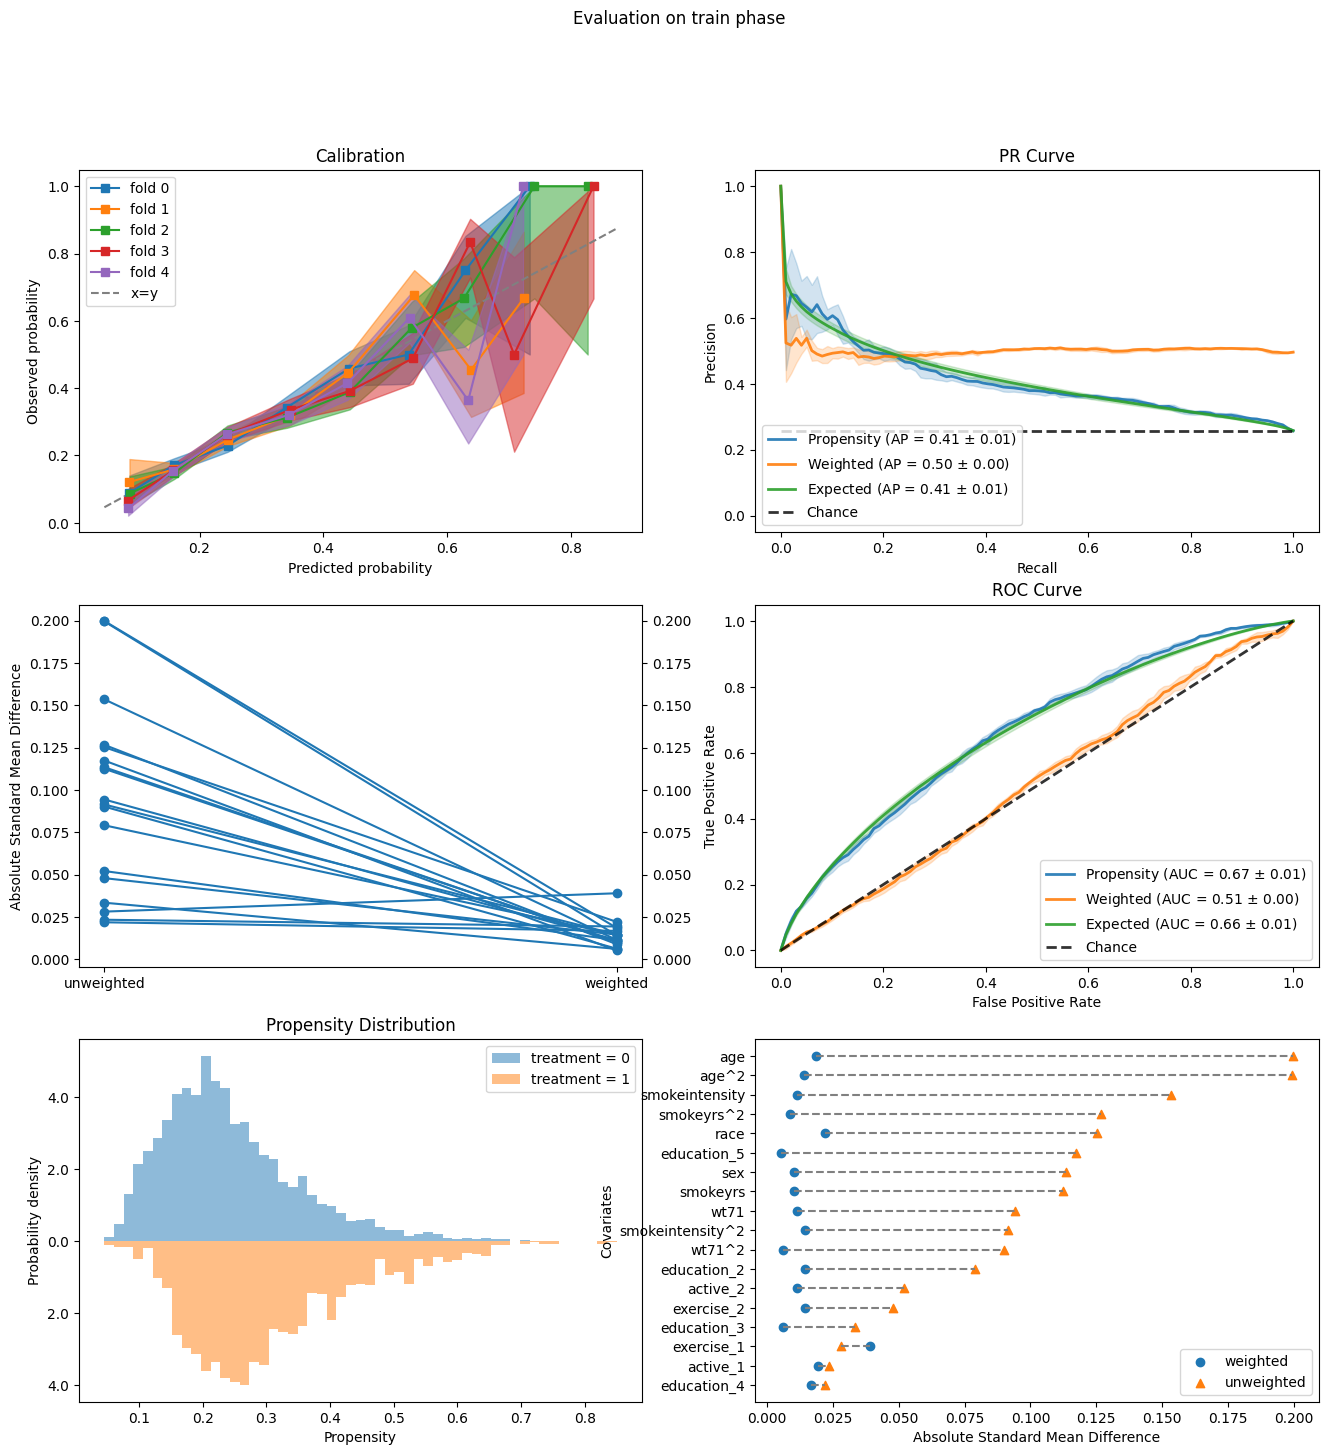

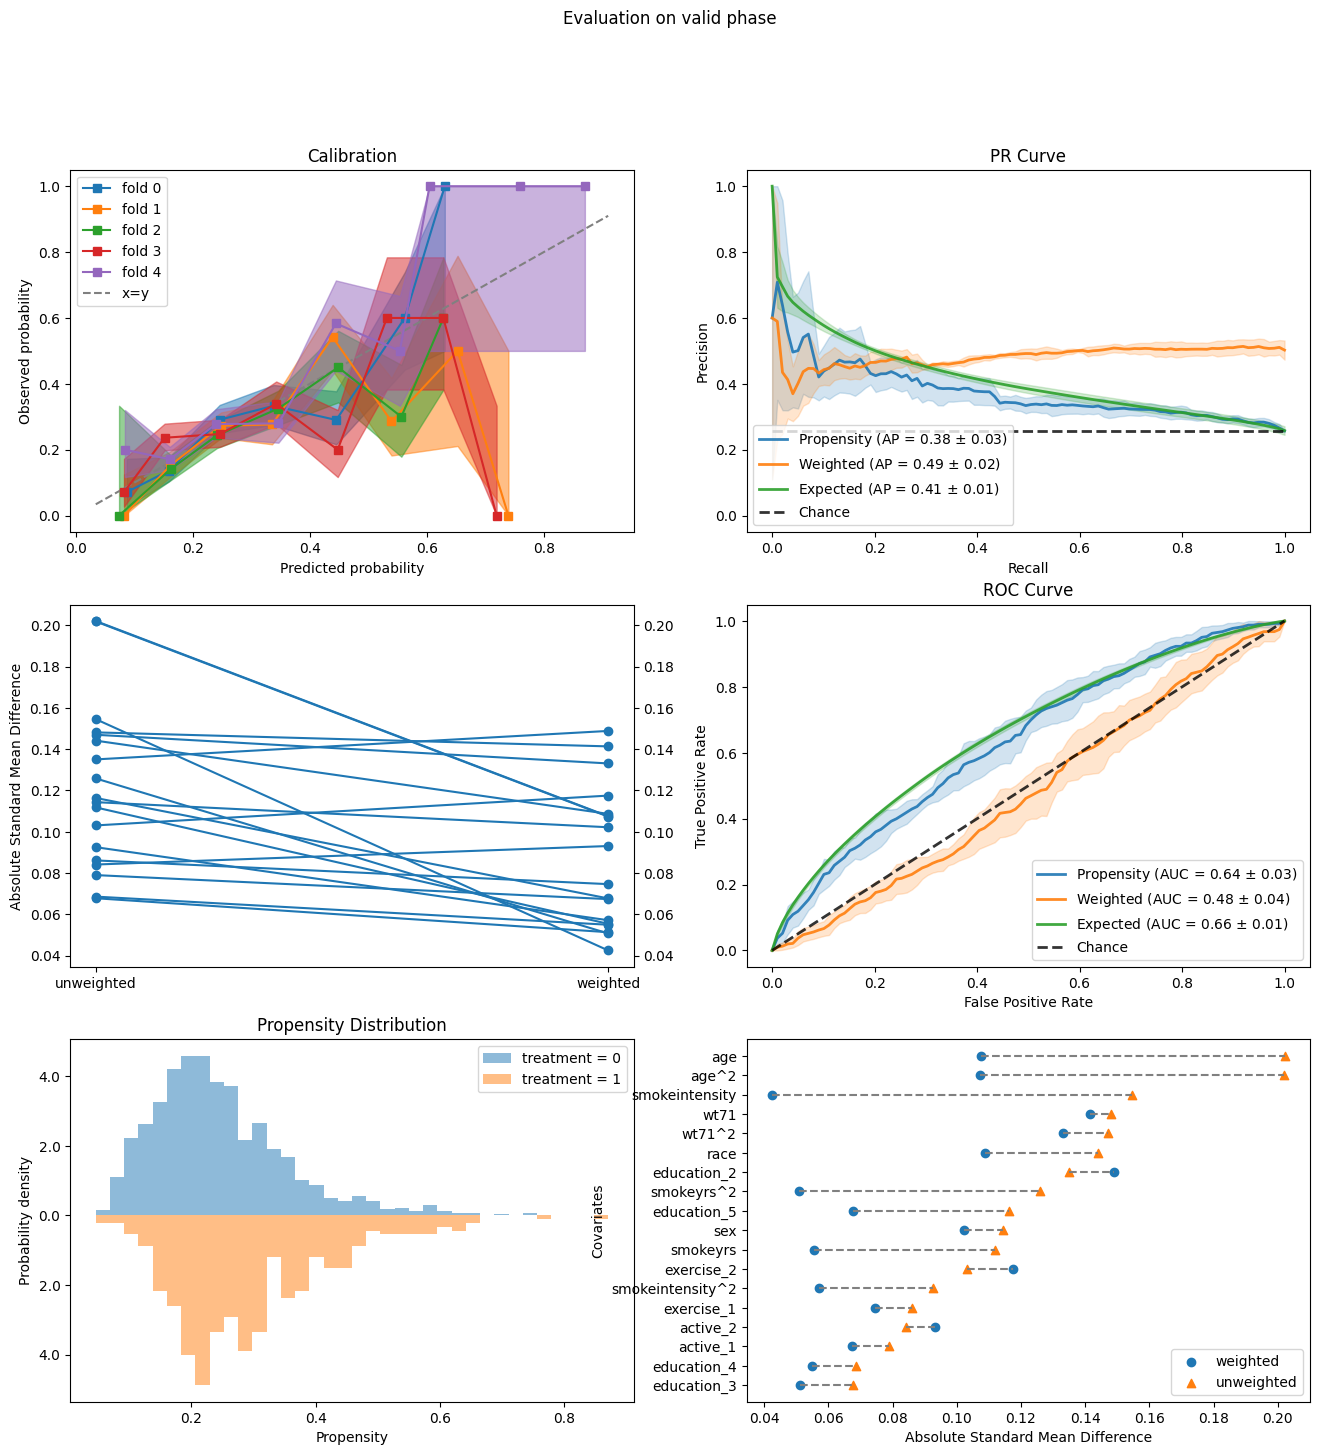

In [14]:
metrics = {"roc_auc": metrics.roc_auc_score,
           "avg_precision": metrics.average_precision_score,}
ipw = IPW(LogisticRegression(solver="liblinear"))
results = evaluate(ipw, data.X, data.a, data.y, cv="auto", metrics_to_evaluate=metrics)
results.plot_all()

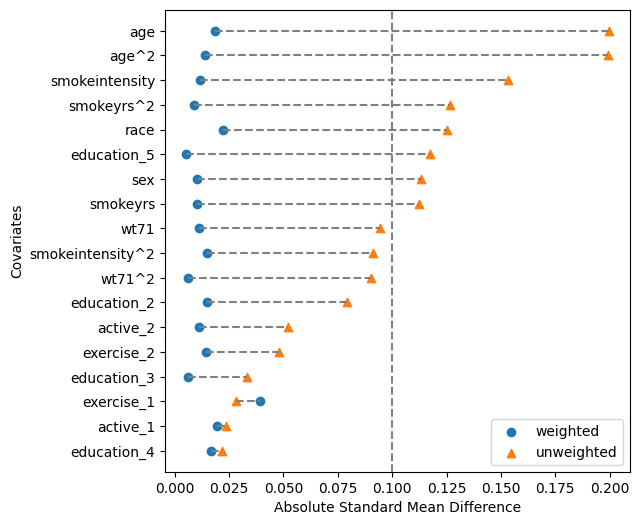

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
results.plot_covariate_balance(kind="love", ax=ax, thresh=0.1);

In [315]:
# Müll
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


new_merge = KPIs.merge(aid, how = 'left', left_on='company', right_on='Name des Beihilfeempfängers')
new_merge.drop_duplicates(keep='first', inplace=True)
new_merge = new_merge.loc[new_merge['year'].between(2019,2020)]

X = new_merge[['year', 'Beihilfeinstrument']]


X["Beihilfeinstrument" ] = np.where(X["Beihilfeinstrument" ] == "Zuschuss", 1, 0)
X["year"].replace({2019: 0, 2020: 1}, inplace=True)
X["combined"] = X["Beihilfeinstrument" ]*X["year"]
kpi_list = ['current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']

for kpi in kpi_list:
    print(kpi)
    y = new_merge[kpi]
    lr.fit(X, y)
    print(lr.coef_)  # the coefficient for gt is the DID, which is 2.75

current_ratio
[ 0.51339289 -0.15026223 -0.06437392]
qick_ratio
[ 0.43521269  0.1573242  -0.02041691]
cash_ratio
[ 0.13410931  0.16576102 -0.0661984 ]
debt2equity_ratio
[0.49392671 0.57106727 0.15192829]
debt2asset_ratio
[ 0.01841989 -0.00805423  0.01336918]
equity_ratio
[-0.0380973  -0.00969569  0.00992994]


In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


df_reg = KPIs.merge(aid, left_on='company', right_on='Name des Beihilfeempfängers')
X = df_reg[['year', 'Beihilfeinstrument']]
X["Beihilfeinstrument" ] = np.where(X["Beihilfeinstrument" ] == "Zuschuss", 1, 0)
X["year"].replace({2019: 0, 2020: 1}, inplace=True)
X["combined"] = X["Beihilfeinstrument" ]*X["year"]
#X
kpi_list = ['current_ratio','qick_ratio','cash_ratio','debt2equity_ratio','debt2asset_ratio','equity_ratio']

for kpi in kpi_list:
    print(kpi)
    y = df_reg[kpi]
    lr.fit(X, y)
    print(lr.coef_)  # the coefficient for gt is the DID, which is 2.75

current_ratio
[ 0.57125199  0.12662788 -0.19140134]
qick_ratio
[ 0.53893421  0.43769879 -0.1608574 ]
cash_ratio
[ 0.29390829  0.34678982 -0.18205651]
debt2equity_ratio
[-0.82946869  0.3543346   1.18581079]
debt2asset_ratio
[-0.01351699  0.00397858  0.0237076 ]
equity_ratio
[ 0.0098507   0.00640507 -0.01146039]


In [54]:
df_reg = KPIs.merge(aid, left_on='company', right_on='Name des Beihilfeempfängers')
df_reg = df_reg[["debt2equity_ratio","year","Beihilfeinstrument" ]] # Choose KPI
df_reg["Beihilfeinstrument" ] = df_reg["Beihilfeinstrument"] == "Zuschuss"
df_reg["Beihilfeinstrument" ].replace({False: 0, True: 1}, inplace=True)
df_reg["year"].replace({2019: 0, 2020: 1}, inplace=True)
df_reg["combined"] = df_reg["Beihilfeinstrument" ]*df_reg["year"]

In [55]:
#df_reg = df_reg.rename(columns={'7': 'kpi', '1': 'time'})
df_reg

,debt2equity_ratio,year,Beihilfeinstrument,combined
0,5.943574,1,0,0
1,5.943574,1,1,1
2,5.943574,1,1,1
3,5.943574,1,0,0
4,5.943574,1,1,1
...,...,...,...,...
1083,0.367185,0,1,0
1084,4.456814,1,0,0
1085,4.513952,0,0,0
1086,4.024574,1,1,1


In [57]:
# regression via sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_reg[['year', 'Beihilfeinstrument', 'combined']]
y = df_reg["debt2equity_ratio"]

lr.fit(X, y)
lr.coef_  # the coefficient for gt is the DID, which is 2.75

array([-0.82946869,  0.3543346 ,  1.18581079])

In [21]:
# regression via statsmodels
# result is not significant 

from statsmodels.formula.api import ols
ols = ols('kpi ~ time + Beihilfeinstrument + combined', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.537
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000898
Time:                        23:00:32   Log-Likelihood:                -2080.0
No. Observations:                1088   AIC:                             4168.
Df Residuals:                    1084   BIC:                             4188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.7006      0

In [51]:
from statsmodels.formula.api import ols
ols = ols('kpi ~  Beihilfeinstrument + time + combined', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6821
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.563
Time:                        17:23:53   Log-Likelihood:                -3840.7
No. Observations:                1088   AIC:                             7689.
Df Residuals:                    1084   BIC:                             7709.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.9025      1

In [33]:
import statsmodels.api as sm

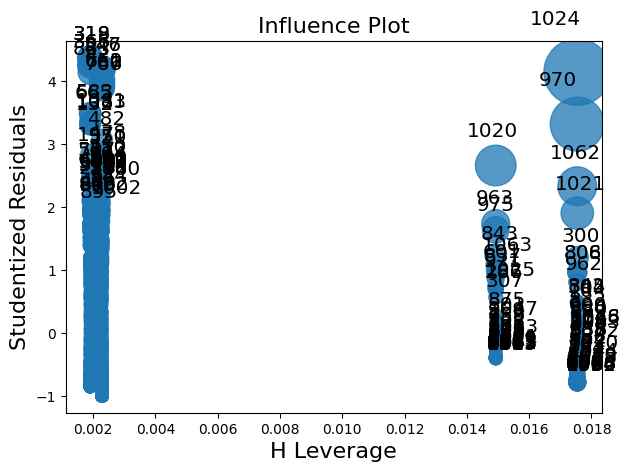

In [44]:
fig = sm.graphics.influence_plot(ols, criterion="cooks")
fig.tight_layout(pad=1.0)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


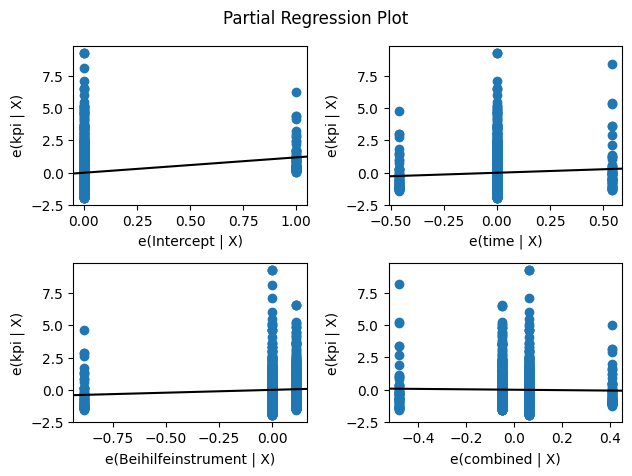

In [35]:
fig = sm.graphics.plot_partregress_grid(ols)
fig.tight_layout(pad=1.0)